In [31]:
import pandas as pd
import yfinance as yf

In [32]:
#Donwload dos dados históriocos
acao = 'PETR4'
inicio = '2020-01-01'
df = yf.download(f'{acao}.SA', start=inicio)

[*********************100%***********************]  1 of 1 completed


# Média Movel Simples

In [33]:
def ma(data, period: tuple):
    data = data[['Adj Close']]

    for i in period:
        data[f'ma_{i}'] = data['Adj Close'].rolling(i).mean()

    data.plot(figsize = (15,10))

    return data


<ipython-input-33-828a27d1c818>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'ma_{i}'] = data['Adj Close'].rolling(i).mean()


,Adj Close,ma_9,ma_21,ma_100
Date,,,,
2020-01-02,20.466219,NaN,NaN,NaN
2020-01-03,20.299557,NaN,NaN,NaN
2020-01-06,20.539551,NaN,NaN,NaN
2020-01-07,20.459553,NaN,NaN,NaN
2020-01-08,20.332890,NaN,NaN,NaN
...,...,...,...,...
2022-05-20,31.255127,30.458466,28.901044,26.873341
2022-05-23,32.484512,30.833365,29.142050,26.962361
2022-05-24,31.600000,30.997315,29.360166,27.042290


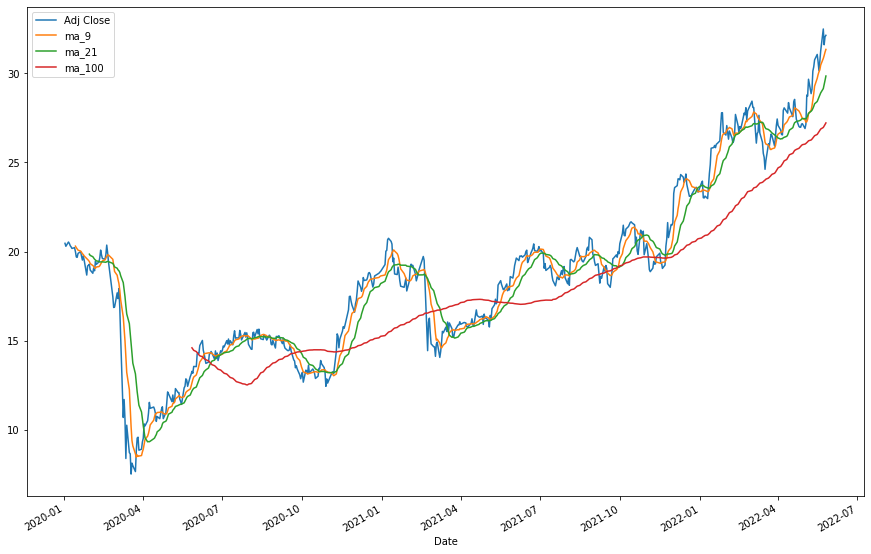

In [34]:
ma(df, [9,21,100])